# Sign Language MNIST

https://www.kaggle.com/datasets/datamunge/sign-language-mnist

In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [72]:
print(timer())

13436.890637261


In [73]:
train_full = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")
train_full.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [74]:
label_map = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [75]:
X_train = train_full.values[:,1:].astype(np.float32())
y_train = train_full.values[:,0]
X_test = test.values[:,1:].astype(np.float32())
y_test = test.values[:,0]

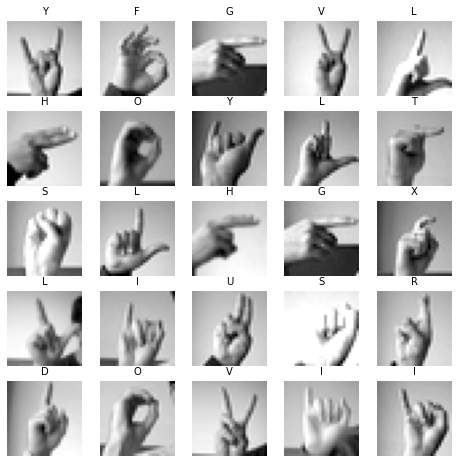

In [76]:
# visualizing random images from the training set
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(8,8))
train_len = X_train.shape[0]

for ax in axs.reshape(-1):
    idx = np.random.randint(train_len)
    ax.set_title(label_map[y_train[idx]], size=10)
    ax.axis('off')
    ax.imshow(X_train[idx].reshape((28,28)), cmap='gray');

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classic Machine Learning Models


In [78]:
from sklearn.metrics import accuracy_score

models_data = {}

def model_fit_and_print_acc(model):
    start_train = timer()
    model.fit(X_train, y_train)
    end_train = timer()
    start_pred = timer()
    train_pred = model.predict(X_train)
    end_pred = timer()
    train_acc = accuracy_score(train_pred, y_train)
    print("Train accuracy: ", train_acc)
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(test_pred, y_test)
    print("Test accuracy: ", test_acc)
    return [end_train-start_train, end_pred-start_pred, train_acc, test_acc]

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)
models_data['Logistic Regression'] = model_fit_and_print_acc(log_reg)

Train accuracy:  1.0
Test accuracy:  0.6985499163413273


In [80]:
models_data

{'Logistic Regression': [51.76809377000063,
  0.2898334090004937,
  1.0,
  0.6985499163413273]}

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
models_data['KNN'] = model_fit_and_print_acc(knn)

Train accuracy:  0.9989801493352759
Test accuracy:  0.8103736754043502


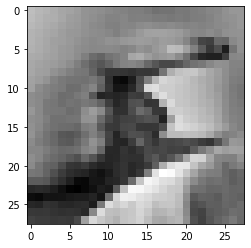

In [82]:
plt.imshow(X_test[0].reshape((28,28)),cmap='gray')

In [89]:
X_test.shape

(7172, 784)

In [103]:
predx=X_test[0].reshape((28,28,1)).flatten()

In [104]:
predx.shape

(784,)

In [109]:
predict_y=knn.predict([predx])

In [110]:
predict_y

array([6])

In [111]:
label_map[predict_y[0]]

'G'